<a href="https://colab.research.google.com/github/suyeonlee333333/oss2025/blob/main/%EC%95%84%EB%A7%88%EC%A1%B4_%EC%A3%BC%EA%B0%80_%EB%B6%84%EC%84%9D%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

Amazon 주식 데이터 2000-2025


In [20]:
import pandas as pd

df = pd.read_csv('Amazon stock data 2000-2025.csv')
display(df.head())

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


## Data exploration

아마존 주식 데이터를 불러온 후 데이터 유형, 결측값, 통계 요약을 확인하고,
주가의 시간별 변화 추이를 시각화하여 탐색합니다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          6321 non-null   datetime64[ns, UTC]
 1   open          6321 non-null   float64            
 2   high          6321 non-null   float64            
 3   low           6321 non-null   float64            
 4   close         6321 non-null   float64            
 5   adj_close     6321 non-null   float64            
 6   volume        6321 non-null   int64              
 7   year          6321 non-null   int32              
 8   20_day_MA     6302 non-null   float64            
 9   50_day_MA     6272 non-null   float64            
 10  200_day_MA    6122 non-null   float64            
 11  daily_return  6320 non-null   float64            
 12  month         6321 non-null   int32              
 13  year_month    6321 non-null   period[M]          
dtypes: datet

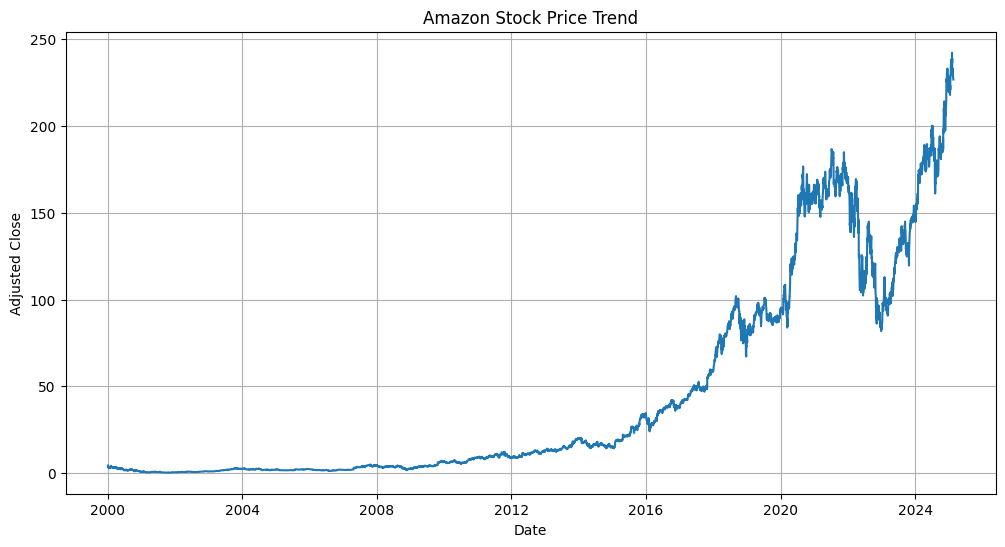

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
# 각 열의 데이터 타입을 확인
print(df.info())

# 결측값 확인
print(df.isnull().sum())

# 데이터의 통계 요약 정보 확인
print(df.describe())

# 데이터 분포를 이해하기 위한 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(pd.to_datetime(df['date'], utc=True), df['adj_close'])  # 날짜를 datetime 형식으로 변환 후 그래프 그리기
plt.xlabel('Date')  # x축 라벨
plt.ylabel('Adjusted Close')  # y축 라벨
plt.title('Amazon Stock Price Trend')  # 그래프 제목: 아마존 주가 변동 추이
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

## Data cleaning

### Subtask:

아마존 주식 데이터를 정리하여 잠재적인 불일치나 오류를 처리합니다.

중복된 행 제거: 동일한 데이터가 여러 번 존재할 수 있으므로 중복 행을 제거합니다.
'date' 열을 datetime 형식으로 변환: 날짜 정보를 올바르게 처리하기 위해 datetime 형식으로 변환합니다.
숫자형 열을 적절한 형식으로 변환: open, high, low, close, adj_close, volume과 같은 숫자형 데이터를 올바른 형식으로 변환하여 데이터의 일관성을 유지합니다.


**Reasoning**:
중복된 행 제거: 동일한 데이터가 여러 번 존재할 경우 분석 결과에 영향을 줄 수 있으므로 중복된 행을 삭제합니다.
'date' 열을 datetime 형식으로 변환: 날짜 데이터를 올바르게 해석하고 시간 기반 분석을 수행할 수 있도록 datetime 형식으로 변환합니다.
숫자형 열을 적절한 형식으로 변환: open, high, low, close, adj_close, volume 등의 숫자형 데이터를 정수 또는 부동소수점 형식으로 변환하여 계산 및 분석이 정확하게 이루어지도록 합니다.










In [22]:
# 중복된 행 제거
df = df.drop_duplicates()

# 'date' 열을 datetime 형식으로 변환 (utc=True 추가)
df['date'] = pd.to_datetime(df['date'], utc=True)

# 숫자형 열을 적절한 형식으로 변환 (필요한 경우)
numerical_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numerical_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')  # 변환할 수 없는 값은 NaN으로 처리

**Reasoning**:

주가 및 거래량(Column: open, high, low, close, adj_close, volume)에서 **이상치(outlier)**가 있는지 확인해야 합니다.
이상치는 데이터 분석 및 모델링에 영향을 미칠 수 있으므로 이를 탐색하는 것이 중요합니다.
이를 위해 **박스플롯(box plot)**과 **기술 통계(descriptive statistics)**를 활용하여 이상치를 식별할 수 있습니다.



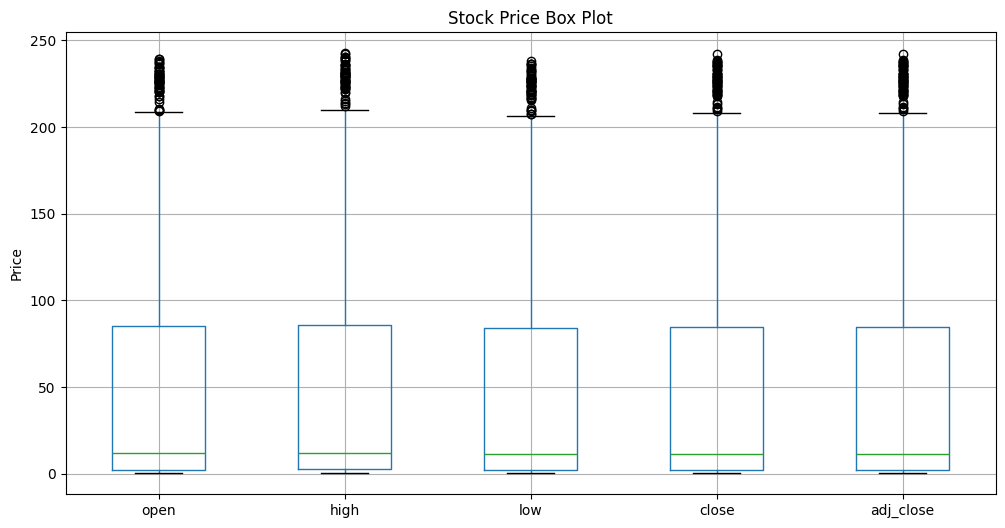

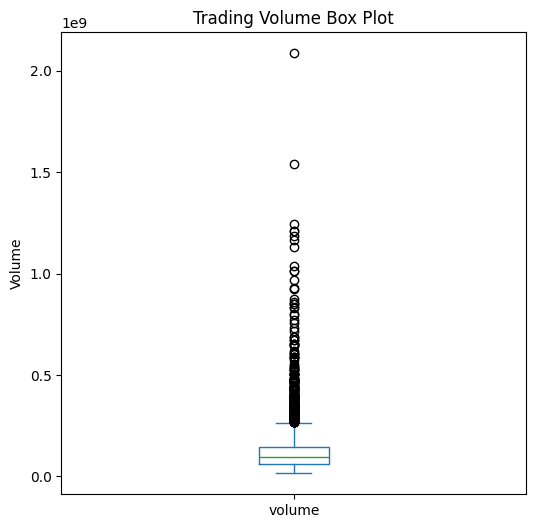

              open         high          low        close    adj_close  \
count  6321.000000  6321.000000  6321.000000  6321.000000  6321.000000   
mean     44.736023    45.251977    44.176568    44.729400    44.729400   
std      59.578629    60.241809    58.852822    59.562415    59.562415   
min       0.295500     0.305000     0.275500     0.298500     0.298500   
25%       2.363500     2.415500     2.306000     2.364000     2.364000   
50%      11.602000    11.737500    11.420000    11.595000    11.595000   
75%      85.140503    85.779999    83.903000    84.817497    84.817497   
max     239.020004   242.520004   238.029999   242.059998   242.059998   

             volume  
count  6.321000e+03  
mean   1.180771e+08  
std    9.758263e+07  
min    1.500750e+07  
25%    6.215930e+07  
50%    9.595200e+07  
75%    1.433920e+08  
max    2.086584e+09  


In [33]:

# 주가 관련 열의 박스플롯(Box Plot) 시각화
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close', 'adj_close']].boxplot()  # 주가 관련 데이터 박스플롯 생성
plt.title('Stock Price Box Plot')  # 그래프 제목: 주가 박스플롯
plt.ylabel('Price')  # y축 라벨: 가격
plt.show()  # 그래프 출력

# 거래량(volume) 박스플롯(Box Plot) 시각화
plt.figure(figsize=(6, 6))
df['volume'].plot.box()  # 거래량 박스플롯 생성
plt.title('Trading Volume Box Plot')  # 그래프 제목: 거래량 박스플롯
plt.ylabel('Volume')  # y축 라벨: 거래량
plt.show()  # 그래프 출력

# 기술 통계를 활용한 이상치 탐색
print(df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].describe())  # 데이터의 통계 요약 정보 출력

## Data analysis

### Subtask:
과거 주가 추세 분석 (Analyze the Historical Stock Price Trends)
아마존 주식의 과거 가격 변동을 분석하여 장기적인 추세를 파악합니다.
이를 위해 조정 종가(adj_close)를 기준으로 **연간 수익률(Annual Return)**을 계산하고, 평균 연간 수익률을 도출합니다.


**Reasoning**:

아마존 주식의 **평균 연간 수익률(Average Annual Return)**을 계산합니다.
이를 위해 **조정 종가(adj_close)**를 기준으로 연도별 첫 번째 가격과 마지막 가격을 비교하여 **연간 수익률(Annual Return)**을 구합니다.
이후, 여러 해 동안의 연간 수익률을 평균 내어 평균 연간 수익률을 도출합니다.



In [24]:
# 조정 종가를 기준으로 연간 수익률 계산
df['year'] = df['date'].dt.year  # 'date' 열에서 연도(year) 추출
annual_returns = df.groupby('year')['adj_close'].agg(['first', 'last'])  # 연도별 첫 번째 및 마지막 조정 종가 추출
annual_returns['annual_return'] = (annual_returns['last'] / annual_returns['first'] - 1) * 100  # 연간 수익률 계산

# 평균 연간 수익률 계산
average_annual_return = annual_returns['annual_return'].mean()  # 연간 수익률의 평균 계산

# 평균 연간 수익률 출력
print(f"평균 연간 수익률: {average_annual_return:.2f}%")

평균 연간 수익률: 32.41%


**Reasoning**:
주가의 급등 또는 급락이 발생한 기간을 식별하기 위해 **이동 평균(rolling average)**을 계산하고, 이를 실제 주가와 비교하여 변동 패턴을 분석한다.



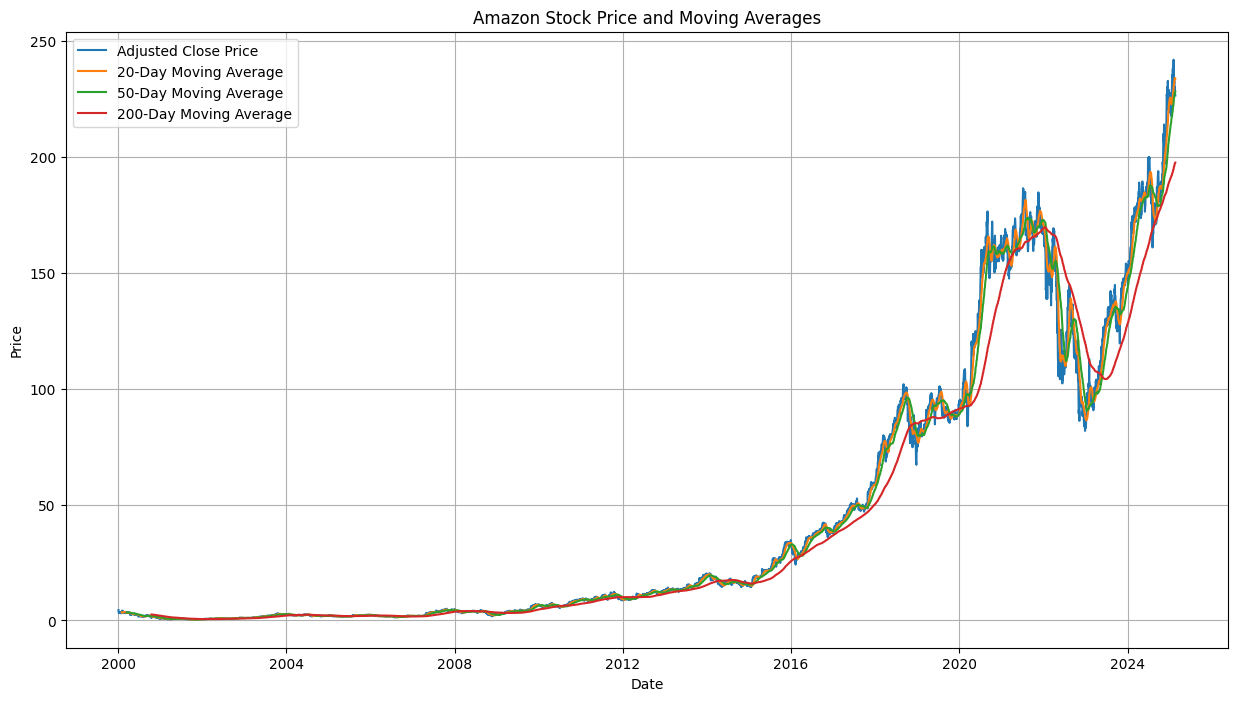

In [34]:

# 이동 평균 계산 (20일, 50일, 200일)
df['20_day_MA'] = df['adj_close'].rolling(window=20).mean()  # 20일 이동 평균 계산
df['50_day_MA'] = df['adj_close'].rolling(window=50).mean()  # 50일 이동 평균 계산
df['200_day_MA'] = df['adj_close'].rolling(window=200).mean()  # 200일 이동 평균 계산

# 주가와 이동 평균선을 그래프로 시각화
plt.figure(figsize=(15, 8))  # 그래프 크기 설정
plt.plot(df['date'], df['adj_close'], label='Adjusted Close Price')  # 실제 주가 (조정 종가)
plt.plot(df['date'], df['20_day_MA'], label='20-Day Moving Average')  # 20일 이동 평균선
plt.plot(df['date'], df['50_day_MA'], label='50-Day Moving Average')  # 50일 이동 평균선
plt.plot(df['date'], df['200_day_MA'], label='200-Day Moving Average')  # 200일 이동 평균선

# 그래프 설정
plt.xlabel('Date')  # x축 라벨 (날짜)
plt.ylabel('Price')  # y축 라벨 (주가)
plt.title('Amazon Stock Price and Moving Averages')  # 그래프 제목: 아마존 주가 및 이동 평균선
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

**Reasoning**:
일별 수익률의 **표준 편차(Standard Deviation)**를 계산하여 **주가 변동성(Volatility)**을 분석한다.


변동성 (일별 수익률의 표준 편차): 0.0310


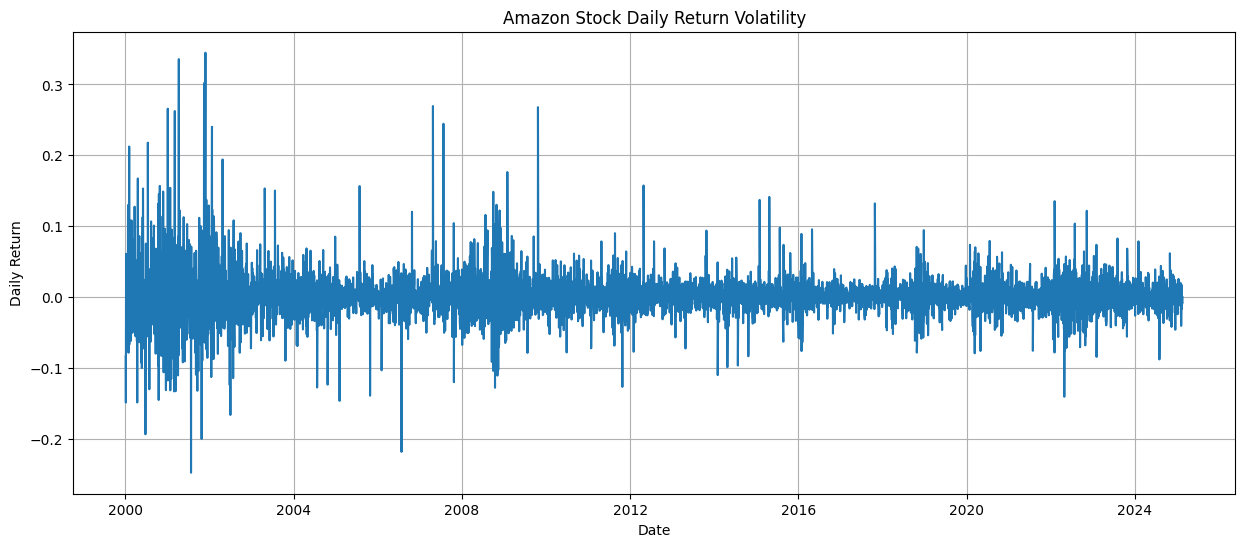

In [35]:

# 일별 수익률(daily return) 계산
df['daily_return'] = df['adj_close'].pct_change()  # 조정 종가의 변화율(%) 계산

# 일별 수익률의 표준 편차(변동성, Volatility) 계산
volatility = df['daily_return'].std()  # 변동성 = 표준 편차(standard deviation)

# 변동성 출력
print(f"변동성 (일별 수익률의 표준 편차): {volatility:.4f}")

# 변동성을 시각화하기 위해 일별 수익률 그래프 그리기
plt.figure(figsize=(15, 6))  # 그래프 크기 설정
plt.plot(df['date'], df['daily_return'])  # 일별 수익률 그래프
plt.xlabel('Date')  # x축 라벨 (날짜)
plt.ylabel('Daily Return')  # y축 라벨 (수익률)
plt.title('Amazon Stock Daily Return Volatility')  # 그래프 제목: 아마존 주식 일별 수익률 변
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

**Reasoning**:
산점도(scatter plot)를 생성하고 **상관 계수(correlation coefficient)**를 계산하여 주가와 거래량 간의 상관관계를 분석한다.



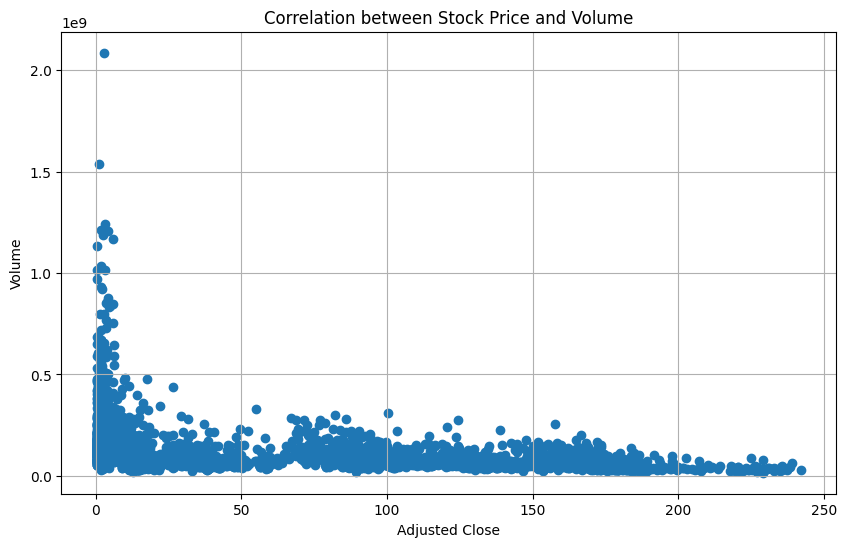

주가와 거래량 간의 상관 계수: -0.3415


In [36]:

import matplotlib.pyplot as plt

# 주가와 거래량의 관계를 시각화하기 위한 산점도(scatter plot) 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(df['adj_close'], df['volume'])  # 조정 종가(adj_close)와 거래량(volume) 간 산점도 그리기
plt.xlabel('Adjusted Close')  # x축 라벨 (주가)
plt.ylabel('Volume')  # y축 라벨 (거래량)
plt.title('Correlation between Stock Price and Volume')  # 그래프 제목: 주가와 거래량 간의 상관관계
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 주가와 거래량 간의 상관 계수(correlation coefficient) 계산
correlation = df['adj_close'].corr(df['volume'])  # 두 변수 간의 상관관계 계산

# 상관 계수 출력
print(f"주가와 거래량 간의 상관 계수: {correlation:.4f}")

## Data visualization

### Subtask:
아마존 주식의 가격 변동 추세를 시각화합니다. 이러한 시각화는 아마존 주식의 가격이 시간에 따라 어떻게 변동했는지, 그리고 가격 변화의 분포가 어떻게 형성되어 있는지를 명확하게 보여줄 수 있습니다.


**Reasoning**:
아마존 주가의 시간에 따른 변화 추세를 시각화하기 위해 **일별, 월별, 연별 종가(line chart)**를 생성하고,
주가 변동성 분석을 위해 **일별 가격 변화에 대한 히스토그램(histogram) 및 박스 플롯(box plot)**을 만든다.


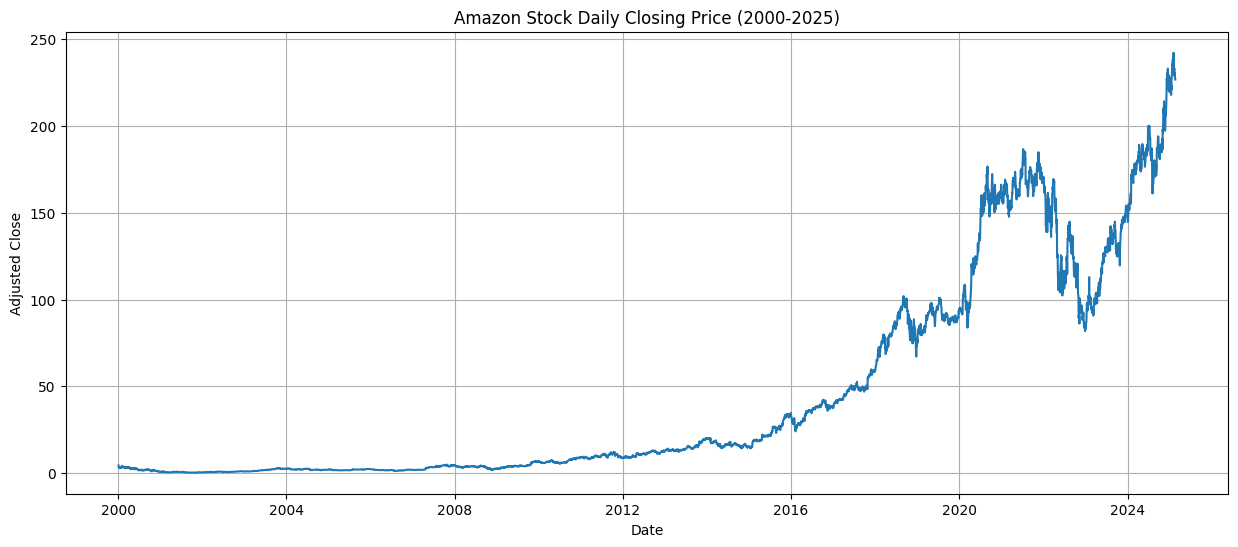

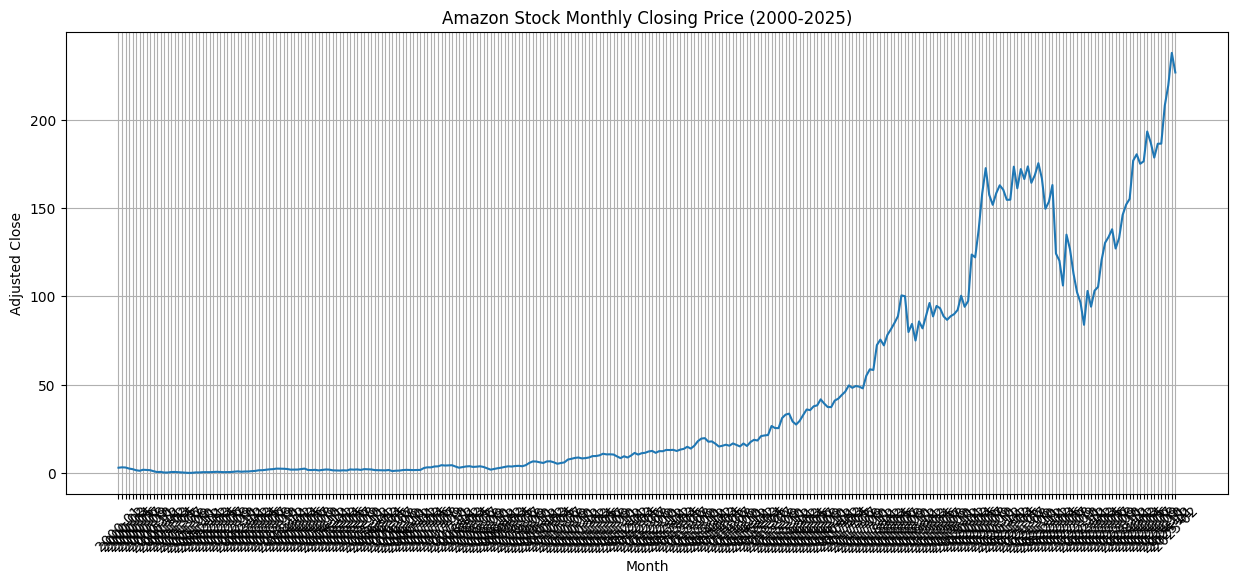

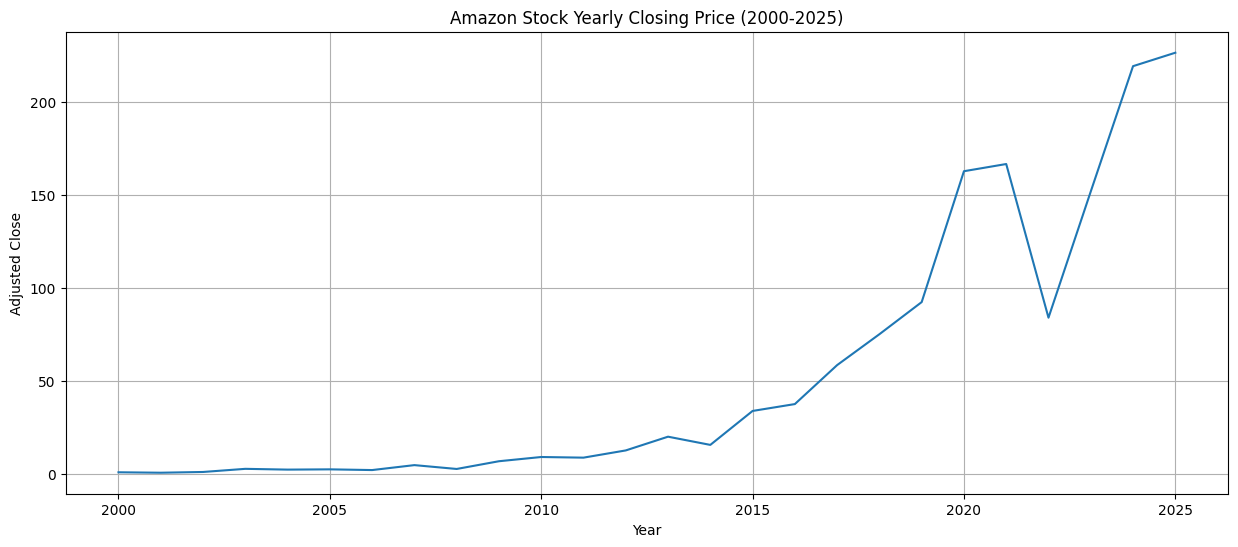

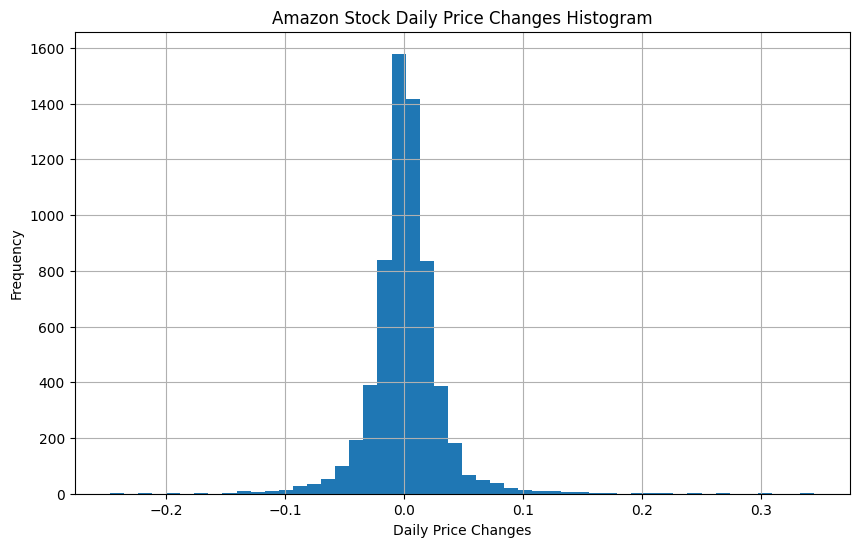

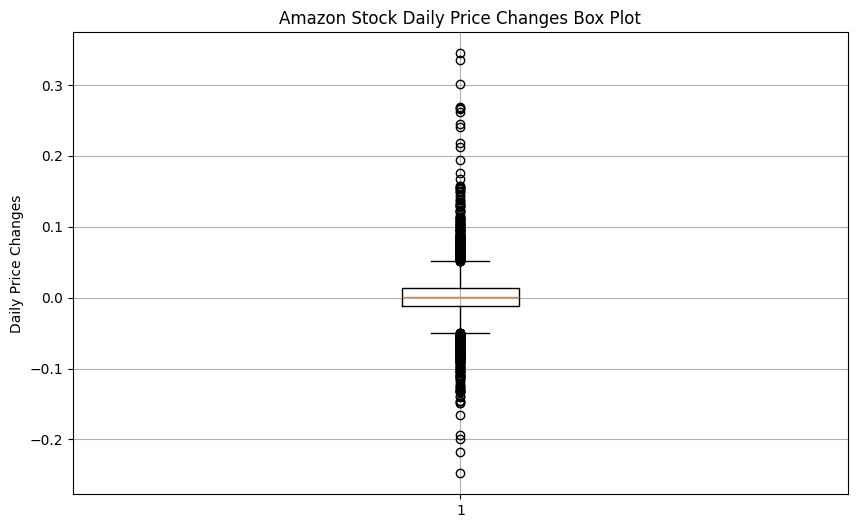

In [38]:
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning, message='.*tz_localize.*')

# 1. 일별 종가(Line Chart) 시각화
plt.figure(figsize=(15, 6))  # 그래프 크기 설정
plt.plot(df['date'], df['adj_close'])  # 날짜별 조정 종가 그래프
plt.xlabel('Date')  # x축 라벨
plt.ylabel('Adjusted Close')  # y축 라벨
plt.title('Amazon Stock Daily Closing Price (2000-2025)')  # 그래프 제목:아마존 주식 일별 종가 (2000-2025)
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 2. 월별 종가(Line Chart) 시각화
df['month'] = df['date'].dt.month  # 날짜에서 월 추출
df['date'] = df['date'].dt.tz_localize(None)  # 시간대 정보 제거
df['year_month'] = df['date'].dt.to_period('M')  # 연-월 단위 변환
monthly_closing_prices = df.groupby('year_month')['adj_close'].last()  # 각 월의 마지막 종가 선택

plt.figure(figsize=(15, 6))  # 그래프 크기 설정
plt.plot(monthly_closing_prices.index.astype(str), monthly_closing_prices)  # 월별 종가 그래프
plt.xlabel('Month')  # x축 라벨
plt.ylabel('Adjusted Close')  # y축 라벨
plt.title('Amazon Stock Monthly Closing Price (2000-2025)')  # 그래프 제목: 아마존 주식 월별 종가 (2000-2025)
plt.grid(True)  # 그리드 추가
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.show()  # 그래프 출력

# 3. 연도별 종가(Line Chart) 시각화
yearly_closing_prices = df.groupby('year')['adj_close'].last()  # 각 연도의 마지막 종가 선택

plt.figure(figsize=(15, 6))  # 그래프 크기 설정
plt.plot(yearly_closing_prices.index, yearly_closing_prices)  # 연도별 종가 그래프
plt.xlabel('Year')  # x축 라벨
plt.ylabel('Adjusted Close')  # y축 라벨
plt.title('Amazon Stock Yearly Closing Price (2000-2025)')  # 그래프 제목:아마존 주식 연도별 종가 (2000-2025)
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 4. 일별 가격 변동 히스토그램(Histogram) 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.hist(df['daily_return'].dropna(), bins=50)  # 일별 수익률 데이터로 히스토그램 생성
plt.xlabel('Daily Price Changes')  # x축 라벨
plt.ylabel('Frequency')  # y축 라벨
plt.title('Amazon Stock Daily Price Changes Histogram')  # 그래프 제목:아마존 주식 일별 가격 변동 히스토그램
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 5. 일별 가격 변동 박스플롯(Box Plot) 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot(df['daily_return'].dropna())  # 일별 수익률 데이터로 박스플롯 생성
plt.ylabel('Daily Price Changes')  # y축 라벨
plt.title('Amazon Stock Daily Price Changes Box Plot')  # 그래프 제목:아마존 주식 일별 가격 변동 박스플롯
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

## Summary:

### 1. Q&A

* **분석 기간 동안 아마존 주식의 평균 연간 수익률은 얼마인가요?** 분석 기간인 2000년부터 2025년까지 아마존 주식의 평균 연간 수익률은 약 32.41%였습니다.
* **아마존 주식의 변동성은 얼마나 되나요? (일일 수익률의 표준편차로 측정)** 변동성, 즉 일일 수익률의 표준편차는 약 0.0310으로 측정되었습니다.
* **아마존 주식 가격과 거래량 사이의 상관관계는 어떻게 되나요?** 아마존 주식 가격과 거래량 사이의 상관관계는 약 -0.3415로, 약한 음의 상관관계를 나타냅니다.


### 2. 데이터 분석 주요 발견

* **강한 평균 연간 수익률:** 아마존 주식의 2000년부터 2025년까지의 평균 연간 수익률은 약 32.41%로, 상당한 성장 잠재력을 나타냅니다.
* **중간 정도의 변동성:** 일일 수익률의 표준편차는 약 0.0310으로, 중간 정도의 가격 변동성을 의미합니다.
* **가격과 거래량 사이의 약한 음의 상관관계::** 아마존 주식 가격과 거래량 사이의 상관계수는 약 -0.3415로, 가격이 상승할 때 거래량이 약간 감소하는 경향을 보이는 약한 음의 상관관계를 나타냅니다.



### 3. 통찰력 및 다음 단계

* **거래량의 이상치 추가 조사:** 분석에서 거래량의 이상치가 확인되었습니다. 이러한 이상치를 깊이 있게 조사하면 시장 이벤트나 비정상적인 거래 활동에 대한 유용한 통찰을 얻을 수 있을 것입니다.
* **예측 모델링 탐색:** 이 분석은 시간에 따른 패턴과 트렌드를 바탕으로 미래 주식 가격을 예측하는 예측 모델링 기법을 탐색하는 기반을 제공합니다. 이는 시계열 분석이나 머신러닝 모델을 사용할 수 있습니다.